### Построение двухслойной нейронный сети для классификации цветков ириса

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
matplotlib.rcParams.update({'font.size': 8})
matplotlib.rcParams.update({'figure.figsize': (16,8)})
matplotlib.rcParams["axes.grid"] = True

In [3]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.set_style('whitegrid')
sns.set_context('talk')

<Figure size 1152x576 with 0 Axes>

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Определение функций

In [5]:
# Шаг 1. Определение функций, которые понадобятся для обучения и преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# Преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# Сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# Нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

#### Подготовка тренировочных данных

In [6]:
# Получения данных из csv файла.
iris_data = pd.read_csv("Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


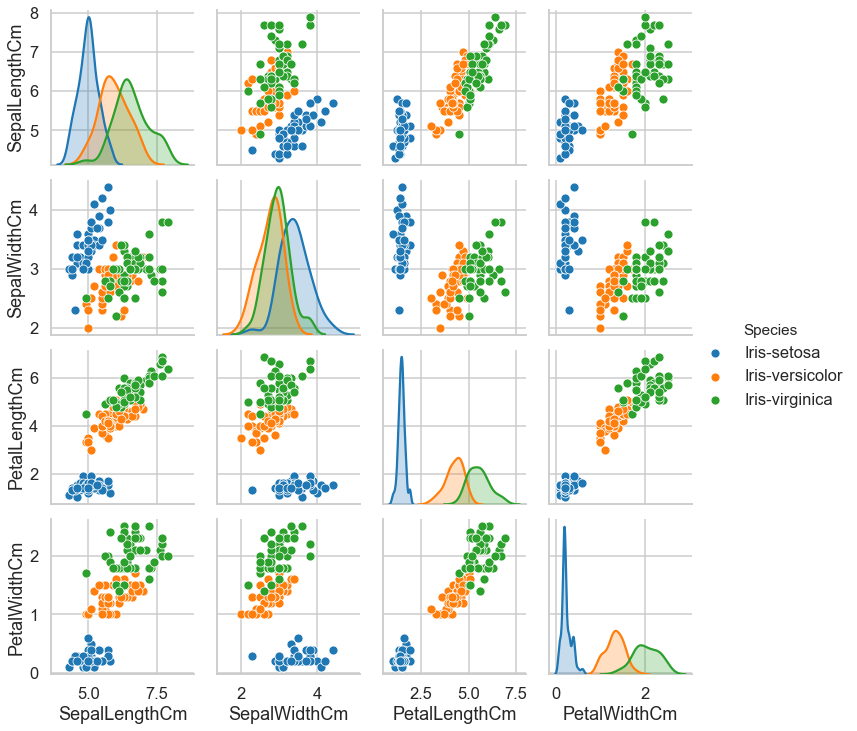

In [7]:
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show()

In [8]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

In [9]:
# Формирование входных данных
X = iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
X = normalize(X)
X

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [10]:
# Формирование выходных данных(результатов)
columns = ['Species']
y = iris_data[['Species']].values
y = y.flatten()
y = to_one_hot(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [11]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)

#### Обученние нейронной сети

In [12]:
# Присвоение случайных весов
np.random.seed(0)
w0 = 2 * np.random.random((4, 5)) - 1 # для входного слоя    - 4 входа (признака),  5 выходов
w1 = 2 * np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода (видов цветков)

# Cкорость обучения (learning rate)
lr = [0.08, 0.1, 0.12, 0.15, 0.2]
# Кол-во итераций
it = 10000

errors = []    # массив ошибок
accuracy = []  # массив точностей

In [13]:
# Процесс обучения
for k, n in enumerate(lr):
    errors.append([])
    for i in range(it):
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
    
        error = np.mean(np.abs(layer2_error))
        errors[k].append(error)
    accuracy.append((1 - error) * 100)
acc10 = accuracy

#### Демонстрация полученных результатов

Скорость: 0.08, Точность 97.5295
Скорость: 0.10, Точность 97.5953
Скорость: 0.12, Точность 97.6308
Скорость: 0.15, Точность 97.6592
Скорость: 0.20, Точность 97.6850


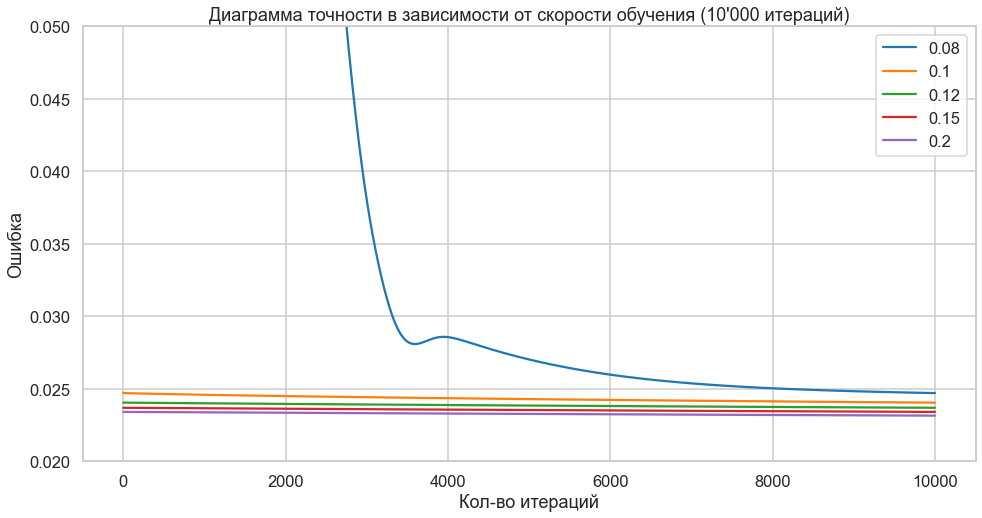

In [14]:
# Диаграмма точности в зависимости от скорости обучения
fig, ax = plt.subplots()
ax.set_ylim(ymin=0.02, ymax=0.05)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
for k, n in enumerate(lr):
    plt.plot(range(it), errors[k], label=str(n))
    print(f'Скорость: {n:.2f}, Точность {accuracy[k]:.4f}')
plt.title("Диаграмма точности в зависимости от скорости обучения (10'000 итераций)")
plt.xlabel('Кол-во итераций')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [15]:
# Присвоение случайных весов
np.random.seed(0)
w0 = 2 * np.random.random((4, 5)) - 1 # для входного слоя    - 4 входа (признака),  5 выходов
w1 = 2 * np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода (результата)
# Кол-во итераций
it = 6000
errors = []
accuracy = []

# Процесс обучения
for k, n in enumerate(lr):
    errors.append([])
    for i in range(it):
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
    
        error = np.mean(np.abs(layer2_error))
        errors[k].append(error)
    accuracy.append((1 - error) * 100)
acc6 = accuracy

Скорость: 0.08, Точность 97.4022
Скорость: 0.10, Точность 97.5565
Скорость: 0.12, Точность 97.5953
Скорость: 0.15, Точность 97.6236
Скорость: 0.20, Точность 97.6492


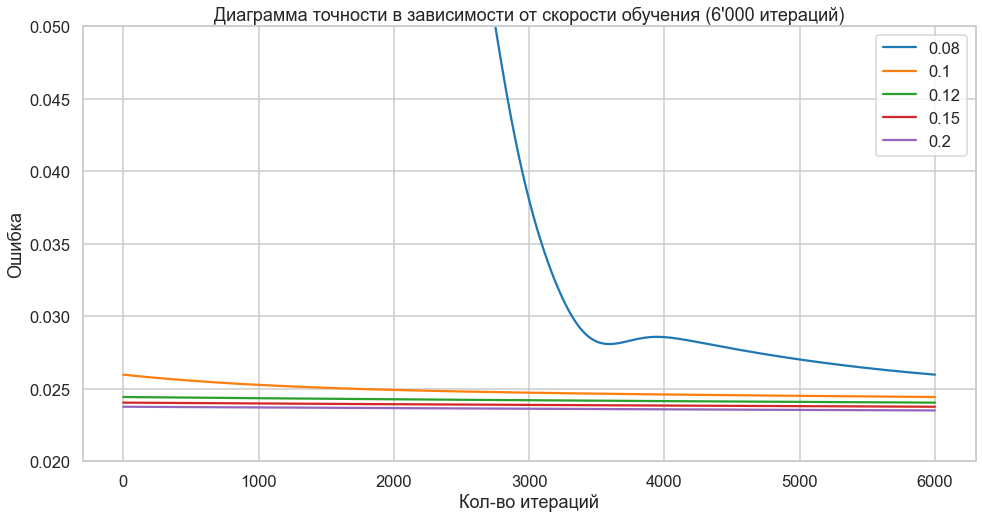

In [16]:
# Диаграмма точности в зависимости от скорости обучения
fig, ax = plt.subplots()
ax.set_ylim(ymin=0.02, ymax=0.05)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
for k, n in enumerate(lr):
    plt.plot(range(it), errors[k], label=str(n))
    print(f'Скорость: {n:.2f}, Точность {accuracy[k]:.4f}')
plt.title("Диаграмма точности в зависимости от скорости обучения (6'000 итераций)")
plt.xlabel('Кол-во итераций')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [17]:
# Итоговая таблица зависимости точности NN от числа итераций и скорости обучения
df = pd.DataFrame({'Скорость': lr, 'It_10000': acc10, 'It_6000': acc6})
df

,Скорость,It_10000,It_6000
0,0.08,97.529490,97.402245
1,0.10,97.595289,97.556465
2,0.12,97.630834,97.595288
3,0.15,97.659227,97.623584
4,0.20,97.685019,97.649174


#### Попробуем изменить кол-во выходов входного слоя (и входов внутреннего слоя)

In [18]:
# Присвоение случайных весов
np.random.seed(0)
w0 = 2 * np.random.random((4, 8)) - 1 # для входного слоя    - 4 входа (признака),  8 выходов
w1 = 2 * np.random.random((8, 3)) - 1 # для внутреннего слоя - 8 входов, 3 выхода (видов цветков)

# Cкорость обучения (learning rate)
lr = [0.1, 0.15, 0.2, 0.25]
# Кол-во итераций
it = 10000

errors = []    # массив ошибок
accuracy = []  # массив точностей

In [19]:
# Процесс обучения
for k, n in enumerate(lr):
    errors.append([])
    for i in range(it):
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
    
        error = np.mean(np.abs(layer2_error))
        errors[k].append(error)
    accuracy.append((1 - error) * 100)
acc10_7 = accuracy

Скорость: 0.10, Точность 96.7217
Скорость: 0.15, Точность 97.3872
Скорость: 0.20, Точность 97.8469
Скорость: 0.25, Точность 97.8708


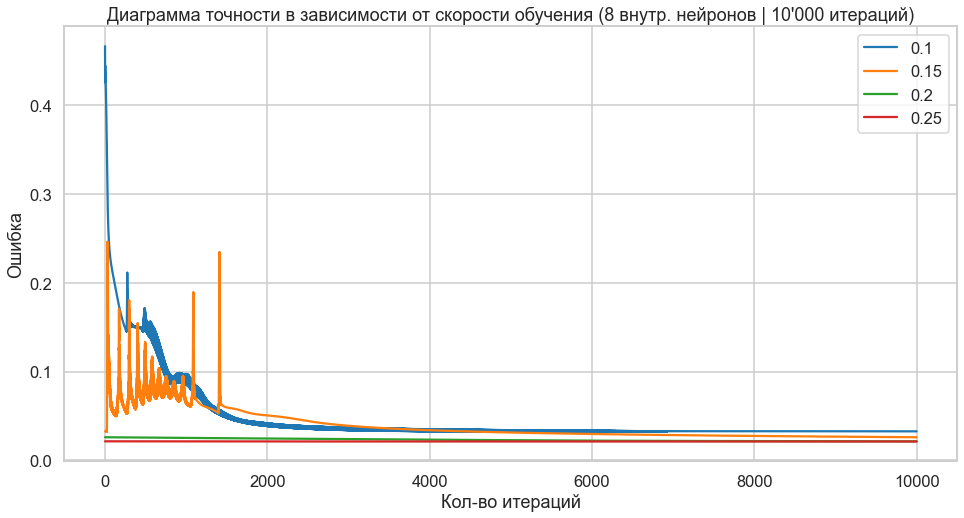

In [20]:
# Диаграмма точности в зависимости от скорости обучения
fig, ax = plt.subplots()
#ax.set_ylim(ymin=0.02, ymax=0.05)
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
for k, n in enumerate(lr):
    plt.plot(range(it), errors[k], label=str(n))
    print(f'Скорость: {n:.2f}, Точность {accuracy[k]:.4f}')
plt.title("Диаграмма точности в зависимости от скорости обучения (8 внутр. нейронов | 10'000 итераций)")
plt.xlabel('Кол-во итераций')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### Выводы:
1. При увеличении скорости обучения - увеличивается точность.   
2. Чем меньше скорость обучения, тем больше итераций нужно затратить, чтобы повысить точность.
3. При скорости обучения более 0.15 и увеличении числа итераций, точность увеличивается всё меньше.
4. При увеличении кол-во нейронов во внутреннем слое до 8-ми, точность стала выше только при скорости обучения >= 0.2